In [1]:
from requirements import *

## 1. Calculating Friedman statistic for Imbalanced/Un-sampled datasets

In [15]:
datasets = []
unlabelled_splits = ['10', '20', '50', '90', '95']

algorithms = ['self_training', 'co_training', 'ss_ensemble', 'unsupervised_labelling', 'intrinsic']
for i in [1,2,3]:
    for split in unlabelled_splits:
        datasets.append("d"+str(i)+"_"+split)
        
print(datasets)

f1_df = pd.DataFrame([],index=datasets, columns=algorithms)

['d1_10', 'd1_20', 'd1_50', 'd1_90', 'd1_95', 'd2_10', 'd2_20', 'd2_50', 'd2_90', 'd2_95', 'd3_10', 'd3_20', 'd3_50', 'd3_90', 'd3_95']


In [49]:
f1_df_imbalanced = pd.read_csv('../data/friedman_f1_imbalanced.csv',index_col=False)

In [50]:
f1_df_imbalanced

,index,self_training,co_training,ss_ensemble,unsupervised_labelling,intrinsic
0,d1_10,0.6226,0.4579,0.66120,0.6505,0.600600
1,d1_20,0.6526,0.4746,0.66540,0.5703,0.601440
2,d1_50,0.5810,0.6090,0.62680,0.5467,0.559000
3,d1_90,0.4918,0.5185,0.60600,0.5714,0.484800
4,d1_95,0.5714,0.1818,0.76920,0.7368,0.500000
5,d2_10,0.8923,0.8888,0.87490,0.9033,0.906200
6,d2_20,0.8727,0.8679,0.90900,0.8276,0.880000
7,d2_50,0.8823,0.8888,0.88235,0.9411,0.882356
8,d2_90,0.6670,0.7499,0.66670,0.6667,1.000000
9,d2_95,1.0000,0.0000,1.00000,1.0000,0.666000


In [51]:
f1_df_imbalanced.set_index('index', inplace=True)

In [52]:
f1_df_imbalanced

,self_training,co_training,ss_ensemble,unsupervised_labelling,intrinsic
index,,,,,
d1_10,0.6226,0.4579,0.66120,0.6505,0.600600
d1_20,0.6526,0.4746,0.66540,0.5703,0.601440
d1_50,0.5810,0.6090,0.62680,0.5467,0.559000
d1_90,0.4918,0.5185,0.60600,0.5714,0.484800
d1_95,0.5714,0.1818,0.76920,0.7368,0.500000
d2_10,0.8923,0.8888,0.87490,0.9033,0.906200
d2_20,0.8727,0.8679,0.90900,0.8276,0.880000
d2_50,0.8823,0.8888,0.88235,0.9411,0.882356
d2_90,0.6670,0.7499,0.66670,0.6667,1.000000


In [53]:
# print(*[row for index, row in f1_df_imbalanced.iterrows()])
from scipy.stats import friedmanchisquare

friedman_test = friedmanchisquare(*[row for index, row in f1_df_imbalanced.iterrows()])
print(friedman_test)

FriedmanchisquareResult(statistic=50.496068620443154, pvalue=5.041842725026233e-06)


### PValue > CriticalValue with $\alpha$ = 0.05 => There is statistical difference among algorithms

### Nemenyi Post-Hoc analysis

cd= 1.5748810531884623


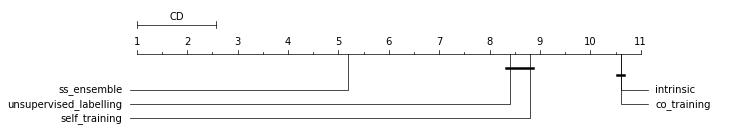

In [54]:
import Orange

avranks = [8.8,10.6,5.2,8.4,10.6]
cd = Orange.evaluation.compute_CD(avranks, 15,alpha="0.05",test="nemenyi")
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, algorithms, cd=cd, width=10, textspace=1.5)
plt.show();

## 2. Calculating Friedman statistic for Sampled Datasets

In [57]:
f1_df_balanced = pd.read_csv('../data/friedman_f1_balanced.csv',index_col=False)

In [58]:
f1_df_balanced.set_index('index', inplace=True)

In [60]:
f1_df_balanced

,self_training,co_training,ss_ensemble,unsupervised_labelling,intrinsic
index,,,,,
d1_10,68.74,64.89,68.70,65.88,62.89
d1_20,68.10,64.65,67.91,66.85,60.71
d1_50,67.50,62.14,66.94,63.71,58.98
d1_90,58.94,56.86,58.69,58.82,59.45
d1_95,69.38,53.83,70.83,69.23,54.05
d2_10,88.52,88.50,90.63,86.67,88.88
d2_20,88.88,88.67,89.28,88.88,88.00
d2_50,87.49,88.88,88.23,88.88,90.32
d2_90,85.71,85.71,66.67,100.00,100.00


In [59]:
friedman_test = friedmanchisquare(*[row for index, row in f1_df_balanced.iterrows()])
print(friedman_test)

FriedmanchisquareResult(statistic=46.943531093638335, pvalue=1.9636861415890516e-05)


### PValue > CriticalValue with $\alpha$ = 0.05 => There is statistical difference among algorithms


cd= 1.5748810531884623


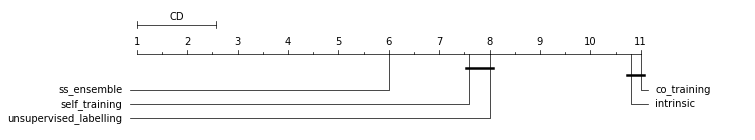

In [61]:
avranks = [7.6,11,6,8,10.8]
cd = Orange.evaluation.compute_CD(avranks, 15,alpha="0.05",test="nemenyi")
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, algorithms, cd=cd, width=10, textspace=1.5)
plt.show();